In [1]:
from sympy import *
from IPython.display import display
init_printing(use_latex=True)
import numpy as np

In [2]:
# define state variables
# x1 = xw; x2 = phi; x3 = vw; x4 = omega
x1, x2, x3, x4, u = symbols('x_1, x_2, x_3, x_4, u')

In [3]:
# define physical constants
mw, ms, g, l, V, k1 = symbols('m_w, m_s, g, l, V, k_1') 

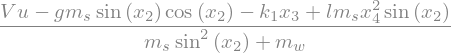

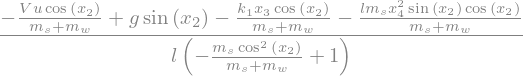

In [4]:
# deq system model 
f1 = x3
display(f1)
f2 = x4
display(f2)
f3 = (1/(mw + ms*sin(x2)**2))*(V*u - k1*x3 + ms*l*x4**2*sin(x2) - ms*g*sin(x2)*cos(x2))
display(f3)
f4 = (1/(l*(1-(ms/(mw+ms))*cos(x2)**2)))*(g*sin(x2)-cos(x2)*V*u/(mw+ms) - cos(x2)*k1*x3/(mw+ms) - ms*l*x4**2*cos(x2)*sin(x2)/(mw+ms))
display(f4)

In [5]:
# read identified constants from mat file
import scipy.io
mat = scipy.io.loadmat('L1_const.mat')
mw_id = mat['l1'][0][0][0][0][0]
V_id = mat['l1'][0][0][1][0][0]
k1_id = mat['l1'][0][0][2][0][0]
parameters = {x1: 0, x2: 0, x3: 0, x4: 0, u: 0, mw: mw_id, ms: 0.5, g: 9.81, l: 0.3, V: V_id, k1: k1_id}

In [6]:
# calculate jacobian with respect to the state variables
# jacobian first row
j11 = float(diff(f1, x1).subs(parameters))
j12 = float(diff(f1, x2).subs(parameters))
j13 = float(diff(f1, x3).subs(parameters))
j14 = float(diff(f1, x4).subs(parameters))

In [7]:
# jacobian second row
j21 = float(diff(f2, x1).subs(parameters))
j22 = float(diff(f2, x2).subs(parameters))
j23 = float(diff(f2, x3).subs(parameters))
j24 = float(diff(f2, x4).subs(parameters))

In [8]:
# jacobian third row
j31 = float(diff(f3, x1).subs(parameters))
j32 = float(diff(f3, x2).subs(parameters))
j33 = float(diff(f3, x3).subs(parameters))
j34 = float(diff(f3, x4).subs(parameters))

In [9]:
# jacobian fourth row
j41 = float(diff(f4, x1).subs(parameters))
j42 = float(diff(f4, x2).subs(parameters))
j43 = float(diff(f4, x3).subs(parameters))
j44 = float(diff(f4, x4).subs(parameters))

In [10]:
A = np.array([[j11, j12, j13, j14], [j21, j22, j23, j24], [j31, j32, j33, j34], [j41, j42, j43, j44]])

In [11]:
# calculate the linearized output vector
g1 = float(diff(f1, u).subs(parameters))
g2 = float(diff(f2, u).subs(parameters))
g3 = float(diff(f3, u).subs(parameters))
g4 = float(diff(f4, u).subs(parameters))

In [12]:
b = np.array([[g1], [g2], [g3], [g4]])

In [13]:
# save numpy as .mat file
scipy.io.savemat('linearized_system.mat', {'A': A, 'b': b})

In [14]:
import control

In [15]:
# penalize x1 (= xw) and x3 (= vw) not so much
# penalize x2 (= phi) and x4 (= omega) more
Q = np.array([[1,0,0,0], [0,100,0,0], [0,0,1,0], [0,0,0,100]])
# penalize input not some much, actuation can be aggressive
r = 0.1
# NOTE: might not work on Windows
K, _, E = control.lqr(A, b, Q, r)

ControlSlycot: can't find slycot module 'sb02md' or 'sb02nt'